In [30]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.model_selection import train_test_split as TTS
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
import statsmodels.iolib.summary2
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats.diagnostic import het_white  # 怀特检验
from statsmodels.stats.outliers_influence import variance_inflation_factor  # 计算VIF方差

In [31]:
# 正常显示汉字和负号
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [32]:
df = pd.read_excel('表单1虚拟变量.xlsx')

In [33]:
data = df.iloc[:, 1:]

In [34]:
### 正态分布检验 
#### Jarque‐Bera检验(大样本 $ n > 30 $)

In [35]:
def JB(X):
    result = stats.jarque_bera(X)
    return pd.Series(result, index=['JB', 'pvalue']).round(4)
JB_test = data.apply(JB)
JB_test

,红,蓝,绿,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,表面风化_风化
JB,93.4102,3.9530,5.2112,9.1869,93.4102,9.0001,9.5625,9.5625,9.0056
pvalue,0.0000,0.1386,0.0739,0.0101,0.0000,0.0111,0.0084,0.0084,0.0111


In [36]:
# 显著性检验，验证该随机变量是否符合正态分布
# 将p值与0.05比较，小于则可拒绝原假设，否则不能拒绝原假设
JB_test.iloc[1,:] > 0.05

红          False
蓝           True
绿           True
纹饰_A       False
纹饰_B       False
纹饰_C       False
类型_铅钡      False
类型_高钾      False
表面风化_风化    False
Name: pvalue, dtype: bool

In [37]:
# ## 斯皮尔曼相关系数
# ### 1.适用条件
# * 分布严重非正态
# * 变量非连续
# * 异常值影响大
# ### 2.斯皮尔曼相关系数矩阵

In [38]:
data.corr('spearman')

,红,蓝,绿,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,表面风化_风化
红,1.000000,0.137147,-0.141755,-0.027116,-0.125000,0.104828,0.250000,-0.250000,0.079057
蓝,0.137147,1.000000,-0.597105,0.439660,0.137147,-0.511180,-0.259056,0.259056,0.016063
绿,-0.141755,-0.597105,1.000000,-0.222493,0.250156,0.057692,-0.211243,0.211243,0.065922
纹饰_A,-0.027116,0.439660,-0.222493,1.000000,-0.271163,-0.795917,0.054233,-0.054233,-0.162924
纹饰_B,-0.125000,0.137147,0.250156,-0.271163,1.000000,-0.366900,-0.500000,0.500000,0.316228
纹饰_C,0.104828,-0.511180,0.057692,-0.795917,-0.366900,1.000000,0.262071,-0.262071,-0.041437
类型_铅钡,0.250000,-0.259056,-0.211243,0.054233,-0.500000,0.262071,1.000000,-1.000000,0.316228
类型_高钾,-0.250000,0.259056,0.211243,-0.054233,0.500000,-0.262071,-1.000000,1.000000,-0.316228
表面风化_风化,0.079057,0.016063,0.065922,-0.162924,0.316228,-0.041437,0.316228,-0.316228,1.000000


In [39]:
#### 3.P值矩阵

In [40]:
def PvalueGetSpearman(X, Y):
    return stats.spearmanr(X, Y)[1].round(4)
data.corr(method=PvalueGetSpearman)

,红,蓝,绿,纹饰_A,纹饰_B,纹饰_C,类型_铅钡,类型_高钾,表面风化_风化
红,1.0000,0.3227,0.3066,0.8457,0.3678,0.4506,0.0683,0.0683,0.5699
蓝,0.3227,1.0000,0.0000,0.0009,0.3227,0.0001,0.0586,0.0586,0.9082
绿,0.3066,0.0000,1.0000,0.1059,0.0681,0.6786,0.1252,0.1252,0.6358
纹饰_A,0.8457,0.0009,0.1059,1.0000,0.0473,0.0000,0.6969,0.6969,0.2392
纹饰_B,0.3678,0.3227,0.0681,0.0473,1.0000,0.0064,0.0001,0.0001,0.0198
纹饰_C,0.4506,0.0001,0.6786,0.0000,0.0064,1.0000,0.0556,0.0556,0.7661
类型_铅钡,0.0683,0.0586,0.1252,0.6969,0.0001,0.0556,1.0000,0.0000,0.0198
类型_高钾,0.0683,0.0586,0.1252,0.6969,0.0001,0.0556,0.0000,1.0000,0.0198
表面风化_风化,0.5699,0.9082,0.6358,0.2392,0.0198,0.7661,0.0198,0.0198,1.0000


In [41]:
# #### 假设检验
# 1. 小样本(n $\leqslant$ 30): 查临界值表(看相关系数矩阵)
# 2. 大样本: 直接看P值矩阵

In [42]:
data.corr(method=PvalueGetSpearman).iloc[:,-1]

红          0.5699
蓝          0.9082
绿          0.6358
纹饰_A       0.2392
纹饰_B       0.0198
纹饰_C       0.7661
类型_铅钡      0.0198
类型_高钾      0.0198
表面风化_风化    1.0000
Name: 表面风化_风化, dtype: float64

In [43]:
data.corr(method=PvalueGetSpearman).iloc[-1,:] > 0.01

红          True
蓝          True
绿          True
纹饰_A       True
纹饰_B       True
纹饰_C       True
类型_铅钡      True
类型_高钾      True
表面风化_风化    True
Name: 表面风化_风化, dtype: bool

In [44]:
pd.Series(data.corr(method=PvalueGetSpearman).iloc[0,:] > 0.01).count()

9

<AxesSubplot:>

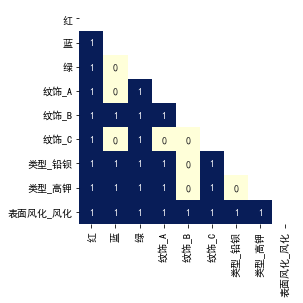

In [45]:
corr = data.corr(method=PvalueGetSpearman) > 0.01
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, square=True, cmap='YlGnBu', cbar=False)


In [46]:
df = pd.read_excel('1.2铅钡.xlsx')
df.columns

Index(['文物编号', '文物采样点', '类型', '风化与否', '二氧化硅(SiO2)', '氧化钠(Na2O)', '氧化钾(K2O)',
       '氧化钙(CaO)', '氧化镁(MgO)', '氧化铝(Al2O3)', '氧化铁(Fe2O3)', '氧化铜(CuO)',
       '氧化铅(PbO)', '氧化钡(BaO)', '五氧化二磷(P2O5)', '氧化锶(SrO)', '氧化锡(SnO2)',
       '二氧化硫(SO2)', '总含量'],
      dtype='object')

In [47]:
## 原始的

In [48]:
# 高钾
origin1=df.iloc[:,3:-1]

X = origin1.iloc[:,1:]
y = origin1.iloc[:,0]
x = sm.add_constant(np.array(X))  # 添加常数项
reg = sm.OLS(y, x)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   风化与否   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     16.85
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           2.39e-11
Time:                        17:10:27   Log-Likelihood:                 5.9888
No. Observations:                  49   AIC:                             18.02
Df Residuals:                      34   BIC:                             46.40
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6216      2.007     -0.310      0.7

In [49]:
# 铅钡
df = pd.read_excel('1.2铅钡.xlsx')
origin1=df.iloc[:,3:-1]

X = origin1.iloc[:,1:]
y = origin1.iloc[:,0]
x = sm.add_constant(np.array(X))  # 添加常数项
reg = sm.OLS(y, x)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   风化与否   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     16.85
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           2.39e-11
Time:                        17:10:27   Log-Likelihood:                 5.9888
No. Observations:                  49   AIC:                             18.02
Df Residuals:                      34   BIC:                             46.40
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6216      2.007     -0.310      0.7

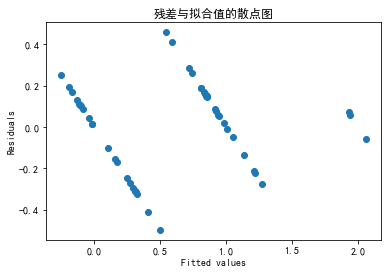

In [50]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline

res = results.resid  # 从OLS回归模型中获取残差
fitted = results.fittedvalues  # 从OLS回归模型中获取拟合值
plt.scatter(fitted, res)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("残差与拟合值的散点图")
plt.show()

In [51]:
## 铅钡模型：挑出样本点做回归

In [52]:
data=df.iloc[:,3:-1].drop([ '氧化镁(MgO)','氧化钾(K2O)', '氧化钙(CaO)','氧化锶(SrO)', '氧化锡(SnO2)'],axis=1)
data.head()

,风化与否,二氧化硅(SiO2),氧化钠(Na2O),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),二氧化硫(SO2)
0,1,36.28,0.0,5.73,1.86,0.26,47.43,0.00,3.57,0.00
1,1,20.14,0.0,1.34,0.00,10.41,28.68,31.23,3.59,2.58
2,2,4.61,0.0,1.11,0.00,3.14,32.45,30.62,7.56,15.03
3,1,33.59,0.0,2.69,0.00,4.93,25.39,14.61,9.38,0.00
4,1,29.64,0.0,3.57,1.33,3.51,42.82,5.35,8.83,0.00


In [53]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
x = sm.add_constant(np.array(X))  # 添加常数项
reg = sm.OLS(y, x)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   风化与否   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     20.59
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           3.33e-12
Time:                        17:10:28   Log-Likelihood:                -1.9044
No. Observations:                  49   AIC:                             23.81
Df Residuals:                      39   BIC:                             42.73
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2046      1.601     -1.377      0.1

In [54]:
## 残差图

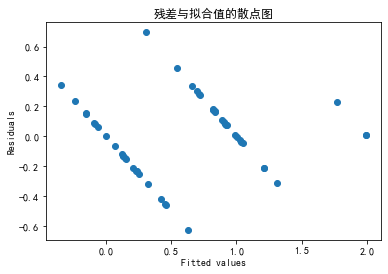

In [55]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline

res = results.resid  # 从OLS回归模型中获取残差
fitted = results.fittedvalues  # 从OLS回归模型中获取拟合值
plt.scatter(fitted, res)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("残差与拟合值的散点图")
plt.show()

In [56]:
lm_statistic, lm_pval = het_white(results.resid, reg.exog)[:2]
print("原假设H0：不存在异方差")
print("卡方检验值：", lm_statistic)
print("p值：", lm_pval)

原假设H0：不存在异方差
卡方检验值： 49.0
p值： 0.4327593961190784


In [57]:
# 如果p值小于0.05，在95%的置信水平上拒绝H0，
# 此处扰动项不存在异方差

In [58]:
## 高钾玻璃

In [59]:
df = pd.read_excel('1.2高钾.xlsx')
df.head()

,文物编号,文物采样点,类型,风化与否,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2),总含量
0,1,01,高钾,0,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39,97.61
1,3,03部位1,高钾,0,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00,100.00
2,3,03部位2,高钾,0,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00,98.88
3,4,04,高钾,0,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36,96.06
4,5,05,高钾,0,61.58,0.0,10.95,7.35,1.77,7.50,2.62,3.27,0.00,0.00,0.94,0.06,0.0,0.47,96.51


In [60]:
data=df[[ '风化与否','二氧化硅(SiO2)','氧化钾(K2O)', '氧化铝(Al2O3)','氧化铜(CuO)']]
data.head()

,风化与否,二氧化硅(SiO2),氧化钾(K2O),氧化铝(Al2O3),氧化铜(CuO)
0,0,69.33,9.99,3.93,3.87
1,0,87.05,5.19,4.06,0.78
2,0,61.71,12.37,5.50,5.09
3,0,65.88,9.67,6.44,2.18
4,0,61.58,10.95,7.50,3.27


In [61]:
X = data.iloc[:,1:]
y = data.iloc[:,0]
x = sm.add_constant(np.array(X))  # 添加常数项
reg = sm.OLS(y, x)
results = reg.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   风化与否   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     11.34
Date:                Sun, 18 Sep 2022   Prob (F-statistic):           0.000349
Time:                        17:10:29   Log-Likelihood:                 1.5119
No. Observations:                  18   AIC:                             6.976
Df Residuals:                      13   BIC:                             11.43
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7374      2.545     -0.683      0.5

c:\Users\19828\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


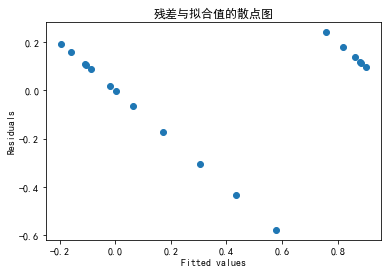

In [62]:
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False
%matplotlib inline

res = results.resid  # 从OLS回归模型中获取残差
fitted = results.fittedvalues  # 从OLS回归模型中获取拟合值
plt.scatter(fitted, res)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("残差与拟合值的散点图")
plt.show()

In [63]:
lm_statistic, lm_pval = het_white(results.resid, reg.exog)[:2]
print("原假设H0：不存在异方差")
print("卡方检验值：", lm_statistic)
print("p值：", lm_pval)

原假设H0：不存在异方差
卡方检验值： 17.630236886222217
p值： 0.22414399728876472
